In [ ]:
### 로컬환경에서 사용하지 말고 꼭 colab에서 실행하세요

In [1]:
# prerequisites

!pip install datasets
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 97.7 MB/s eta 0:00

## 1. Huggingface Datasets에서 법 데이터 가져오기

https://huggingface.co/datasets/lawcompany/KLAID

2022년 16만개의 한국 판례 데이터를 기반으로 한 경진대회 데이터 세트입니다.

In [2]:
from datasets import load_dataset

datasets = load_dataset("lawcompany/KLAID", 'ljp')

Generating train split: 0 examples [00:00, ? examples/s]

Dataset klaid downloaded and prepared to /root/.cache/huggingface/datasets/lawcompany___klaid/ljp/1.0.0/170cd5bb1a0d9f3e383773bc69b51eb6a717918f91b682fe094492d865feaf4c. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# dataset 구조

print(datasets)

DatasetDict({
    train: Dataset({
        features: ['laws_service_id', 'fact', 'laws_service'],
        num_rows: 161192
    })
})


In [4]:
# dataset 예시

datasets['train'][0]

{'laws_service_id': 32,
 'fact': '피고인은 2018. 8. 9. 23:33경 술을 마신 상태로 경산시 사동에 있는 상호 불상의 식당에서부터 같은 동에 있는 부영5차 앞 삼거리까지 B 스타렉스 승용차를 운전한 다음 승용차 안에서 잠을 자던 중, 차량 운전자가 시동을 걸어 놓고 잠을 자고 있다는 112 신고를 받고 현장에 출동한 경산경찰서 C파출소 소속 경위 D으로부터 피고인의 입에서 술 냄새가 나고 보행이 비틀거리는 등 술에 취한 상태에서 운전하였다고 인정할 만한 상당한 이유가 있어 약 10분 동안 총 3회에 걸쳐 음주측정기에 입김을 불어 넣는 방법으로 음주측정에 응할 것을 요구받고도 정당한 사유 없이 이에 응하지 아니하였다.',
 'laws_service': '도로교통법 제148조의2 제2항,도로교통법 제44조 제2항'}

In [5]:
# 데이터셋에 포함된 unique한 법률 사례들

import numpy as np
from collections import Counter

laws = np.unique(datasets['train']['laws_service'])
laws = [_.split(' ')[0] for _ in laws]

Counter(laws)

Counter({'교통사고처리특례법': 15,
         '도로교통법': 22,
         '마약류관리에관한법률': 2,
         '산림자원의조성및관리에관한법률': 1,
         '성매매알선등행위의처벌에관한법률': 3,
         '성폭력범죄의처벌등에관한특례법': 10,
         '아동ㆍ청소년의성보호에관한법률': 7,
         '자동차손해배상보장법': 1,
         '정보통신망이용촉진및정보보호등에관한법률': 3,
         '특정경제범죄가중처벌등에관한법률': 2,
         '특정범죄가중처벌등에관한법률': 12,
         '폭력행위등처벌에관한법률': 4,
         '형법': 96})

교통관련 법률 종류가 15개,<br>
도로교통법 22개,
마약류 2개와 같이 전체 판례를 대상으로 한 데이터셋이 아니라 <br>
특정 주제에 대한 데이터를 담았습니다.

현 예시에서는 '정보통신망이용촉진및정보보호등에관한법률' 에 대한 법률을 포함하겠습니다

In [6]:
def filter_law(df):
    return '정보통신망이용촉진및정보보호등에관한법률' in df['laws_service']

data = datasets['train'].filter(filter_law)

Filter:   0%|          | 0/161192 [00:00<?, ? examples/s]

In [7]:
data[0]

{'laws_service_id': 108,
 'fact': '피고인은 피해자 C와 사실혼 관계에 있었던 사람이다. 누구든지 사람을 비방할 목적으로 정보통신망을 통하여 공공연하게 거짓의 사실을 드러내어 다른 사람의 명예를 훼손하여서는 아니 된다. 1. 피고인은 2014. 8. 14.경 서울 도봉구 D, 301호 피고인의 집에서, 휴대전화를 이용하여 피고인의 ‘카카오스토리’에, 사실은 피해자는 피고인과의 사실혼 관계가 종료된 이후 현재의 남자친구를 만나게 된 것이고, 피고인에게 ‘한 남자론 살 수 없다’는 취지의 말을 한 적도 없으며, 피고인과 사실혼 관계를 시작할 당시 전 동거남을 친구라고 속여 만나고 다닌 사실도 없음에도 불구하고, “  마누라가 다른 남자랑 내가 한두 번 본 사람과 그것두 마누라가 나를 신랑이라고 소개까지 시켜준 사람과 바람피고 다니는 것두 모르고, 난 그 여자랑 애들을 생각해서 괜히 나 때문에 더 힘들까봐 떠난 것인데  그 여자는 자기가 무슨 잘못을 또 무슨 죄를 지었는지두 아직두 모르는 것 같다  그 여자는 한남자론 살수 없다고 했다. 하긴 나랑 첨 살때두 전 동거남을 칭구라고 속여서 만나고 다녔으니 “라는 글을 게시하였다 2. 피고인은 2014. 8. 20.경 위 피고인의 집에서, 휴대전화를 이용하여 피고인의 ‘카카오스토리’에, 사실은 피해자가 피고인에게 울면서 빌거나 껴안고 입을 맞춘 행위를 한 적이 없고, 이미 피고인과의 사실혼 관계가 종료된 상태였으므로 피고인에게 연락을 하면서 지내자거나 함께 살자는 말을 한 적도 없으며, 피고인에게 포기각서를 쓰라고 말한 적이 없음에도 불구하고, ”  그년어머님이나를보더니무릎까지꾸시고자식잘못키운죄라고빌었다.그리고그년방에가니그년이나를보구잘못했다고다자기잘못이라고울면서빌고빌고또빌었다.그러더니나를껴안고울었다그런데,갑자기그년이더러운입술로뽀뽀를하고키스를한것이아닌가그래서그냥참았다!그러더니나한테우리다시살까 이렇게물어보더라완전미친년이지.그래서.난건절대안되지했다.그럼,울그냥오빠동생으로가끔만날까 ㅋㅋ이런다.그년은그

In [8]:
# 최종 학습 데이터 == 720개

print(len(data))

720


## 2. 임베딩을 수행하기 위해 Tokenizer, Model 정의

한국어 clustering, semantic search에 자주 쓰이는
RoBERTa 모델을 허깅페이스에서 불러옵니다.

https://huggingface.co/jhgan/ko-sroberta-multitask

In [9]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sroberta-multitask")
model = AutoModel.from_pretrained("jhgan/ko-sroberta-multitask")

임베딩 함수를 정의합니다.

objective -> 'fact', 즉 판례를 [1, 768] 크기의 숫자 벡터로 임베딩합니다. <br>
model을 gpu에 할당해 더 빠른 연산을 진행합니다.

In [10]:
from tqdm.notebook import tqdm

## gpu 사용
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

def embed_facts(facts):

    ## tokenizer 정의
    inputs = tokenizer(facts, return_tensors="pt", padding=True, truncation=True)
    ## input을 gpu에 할당
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    ## 임베딩한 결과를 다시 cpu로 할당
    embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

    return embeddings

## model to gpu
model.to(device)

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(32000, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [11]:
# 정보보호 관련 사례 train 진행행

progress_bar = tqdm(total=len(data['fact']), desc= "케이스 임베딩")

embeddings = []
for fact in data['fact']:
    embedding = embed_facts([fact])
    embeddings.append(embedding)
    progress_bar.update(1)

progress_bar.close()

케이스 임베딩:   0%|          | 0/720 [00:00<?, ?it/s]

# 3. 코사인 유사도 함수로 가장 유사한 판례들 + 판례명 출력

코사인 유사도 함수로 input sentence를 임베딩한 input_embedding [1, 768] 숫자벡터와<br>
[720, 768] 크기의 720 개의 사례 중 가장 벡터값이 유사한 케이스를 고른 후 출력합니다.

해당 코드는 가장 유사한 10가지 케이스를 출력하게 만들었습니다.

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_most_similar(embedding, embeddings): # embedding : 입력 문장, embeddings : 720 크기의 케이스 임베딩들
    ## 전체 임베딩 결과에 대해 코사인 유사도 함수 적용
    similarities = cosine_similarity(embedding.reshape(1, -1), np.array(embeddings).reshape(len(data['fact']), -1))
    ## 가장 유사한 결과 10개 most_similar_index에 할당
    most_similar_index = np.argsort(similarities[0])[- 10:][::-1]

    return most_similar_index

In [13]:
input_fact = str(input('대조를 원하는 케이스를 입력하세요. : '))
input_embedding = embed_facts([input_fact])[0]

most_similar_indexes = find_most_similar(input_embedding, embeddings)

for _ in range(len(most_similar_indexes)):
    print(f'\n유사 케이스 {_ + 1}:', data['fact'][most_similar_indexes[_]])
    print(f'유사 법률 {_ + 1}:', data['laws_service'][most_similar_indexes[_]])

대조를 원하는 케이스를 입력하세요. : 저작권 침해

유사 케이스 1: 누구든지 정보통신망을 통하여 음란한 부호ㆍ문언ㆍ화상 또는 영상을 배포ㆍ판매ㆍ임대하거나 공공연하게 전시하는 내용의 정보를 유통하여서는 아니된다. 피고인은 2012년 8월 일자불상경 불상의 장소에서 인터넷 웹하드 사이트인 ‘수디스크(http://www.sudisk.co.kr)`에 접속하여 아이디 `B`으로 “꽉끼는 정장치마 엉덩이 예술 소장용(게시물번호 : C)`이라는 982MB짜리 음란물 외 총 3편의 음란물을 업로드 하였다. 이와 같이 피고인은 성적 자극을 유발시키는 음란물을 유포하여 불특정 다수인이 다운받을 수 있게 공유하였다.
유사 법률 1: 정보통신망이용촉진및정보보호등에관한법률 제74조 제1항 제2호,정보통신망이용촉진및정보보호등에관한법률 제44조의7 제1항 제1호

유사 케이스 2: 피고인은 2012. 8. 23. (캡쳐일 2012. 8. 26.) 피고인의 주거지에서 파일공유 사이트인 큐다운(www.qdown.com)에 피고인명의 아이디인 `C(닉네임 D)`로 접속한 다음, 성인자료실 게시판에 ‘서.노 거유와 꿀벅지를 가진 육덕진 서양미시’라는 게시물을 게시함으로써 음란한 영상을 공공연하게 전시하였다.
유사 법률 2: 정보통신망이용촉진및정보보호등에관한법률 제74조 제1항 제2호,정보통신망이용촉진및정보보호등에관한법률 제44조의7 제1항 제1호

유사 케이스 3: 피고인 A은 서비스업에 종사하는 자이다. 피고인은 피해자 B을 비방할 목적으로 2019. 11. 26.경 인터넷 C 사이트내 B의 ‘D’ 앨범 정보 페이지에 접속하여 “사재기하는 B이는 있어”라는 내용으로 댓글을 게시하는 등 공공연하게 거짓의 허위 사실을 드러내어 피해자의 명예를 훼손 하였다.
유사 법률 3: 정보통신망이용촉진및정보보호등에관한법률 제70조 제2항

유사 케이스 4: 누구든지 정보통신망을 이용하여 음란한 부호, 문자, 영상을 전시, 배포하면 아니됨에도 불구하고, 피고인은 2012. 8. 중순경 서울 관악구 C, 1

## 4. Summarization

올려주신 lbox-kr/lbox-open 에서 케이스 데이터를 파인튜닝해서 학습할 수 있었지만 <br>
gpu를 사용해도 학습에 2시간... 이 걸리는 관계로 <br>
성능이 좋은 한국어 summarization model을 허깅페이스에서 가져왔습니다

In [14]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.5 MB/s eta 0:00:00


In [15]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

# 모델과 토크나이저 불러오기
model_t5 = T5ForConditionalGeneration.from_pretrained("eenzeenee/t5-base-korean-summarization")
tokenizer_t5 = AutoTokenizer.from_pretrained("eenzeenee/t5-base-korean-summarization")

In [16]:
model_t5.to(device)

def summarize(text, max_length = 500):
    inputs = tokenizer_t5(text, return_tensors = "pt", max_length = 512, truncation = True).to(device)
    summary_ids = model_t5.generate(inputs["input_ids"],
                                 num_return_sequences = 1,
                                 max_length = max_length,
                                 min_length = 50,
                                 length_penalty = 2.0)

    return tokenizer_t5.decode(summary_ids[0], skip_special_tokens = True)

In [17]:
for _ in range(len(most_similar_indexes)):
    print(f'\n유사 케이스 요약 {_ + 1}:', summarize(data['fact'][most_similar_indexes[_]]))


유사 케이스 요약 1: 피고인은 2012년 8월 불상의 장소에서 인터넷 웹하드 사이트인 수디스크에 접속하여 음란물을 업로드 하여 성적 자극을 유발시키는 음란물을 유포하여 불특정 다수인이 다운받을 수 있게 공유하였다.

유사 케이스 요약 2: 음란한 영상을 공공연하게 전시한 피고인은 파일공유 사이트인 큐다운에 피고인명의 아이디로 접속한 다음 성인자료실 게시판에 음란한 영상을 공공연하게 전시하였다.

유사 케이스 요약 3: 피고인은 피해자 B을 비방할 목적으로 피해자의 명예를 훼손하였다. 피해자 B을 비방할 목적으로 공공연하게 거짓의 허위 사실을 드러내어 피해자의 명예를 훼손하였다.

유사 케이스 요약 4: 피고인은 피고인의 집에 있는 컴퓨터를 이용하여 인터넷 웹하드 사이트에 접속한 다음 음란 동영상을 업로드하여 사이트에 접속한 불특정 다수의 사람들이 자유롭게 다운로드 받을 수 있도록 공공연하게 전시 배포하였다.

유사 케이스 요약 5: 피고인은 피고인의 주거지에서 파일공유 사이트인 큐다운에 아이디 B 닉네임 C를 사용하여 접속한 다음 성인자료실 게시판에 음란동영상을 업로드함으로써 위 사이트 성인인증을 한 회원이면 누구나 다운받아 볼 수 있도록 음란한 영상을 전시하였다.

유사 케이스 요약 6: 피고인은 정보통신망을 통해 음란한 부호나 문언 음향 화상 또는 영상을 배포 판매 임대하거나 공공연하게 전시해서는 안 된다. 그럼에도 피고인은 인터넷 베가디스크에 음란한 영상물을 게시 배포했다.

유사 케이스 요약 7: 피고인은 인터넷 웹하드 파일공유 사이트인 탱크디스크에 가입한 회원으로 누구든지 정보통신망을 통하여 음란한 화상 또는 영상을 배포하거나 공연히 전시하여서는 아니된다. 그럼에도 불구하고 피고인은 3회에 걸쳐 10편의 음란동영상을 위 사이트에 업로드하여 불특정다수인이 이를 다운받을 수 있도록 공유함으로써 음란한 영상을 배포하였다.

유사 케이스 요약 8: 피고인은 정보통신망을 이용하여 음란한 부호나 문자 영상을 전시 배포하면 안 됨에도 불구하고 컴퓨터를 이용하여

## 판례예측은 lbox/open 데이터셋에 저작권 결과 데이터가 없어서 만들 수 없었습니다

## 5. Extra: text to img

이번 프로젝트에서 텍스트를 이미지 생성에 사용하는 diffusion model을 사용하고 싶었는데 쓸 각이 보이지 않아서 아쉽네요... <br>
그래서 아쉬움에 몇가지 예제 남겨봅니다.

In [1]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.

In [2]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

repo = "Bingsu/my-korean-stable-diffusion-v1-5"
euler_ancestral_scheduler = EulerAncestralDiscreteScheduler.from_config(repo, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    repo, scheduler=euler_ancestral_scheduler, torch_dtype=torch.float16,
)
pipe.to("cuda")

Error caught was: No module named 'triton'
/usr/local/lib/python3.9/dist-packages/diffusers/configuration_utils.py:203: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizerFast"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

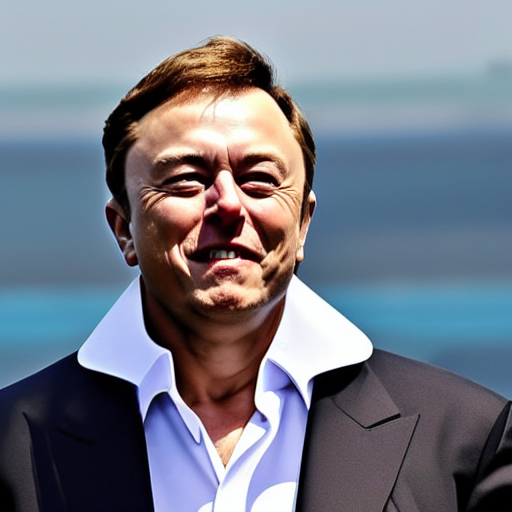

In [20]:
prompt = "트위터를 인수하고 파산한 elon musk"
seed = 7777
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

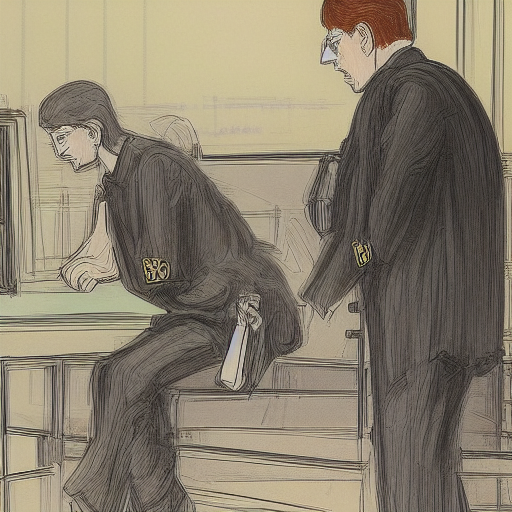

In [8]:
prompt = "유사 케이스 요약 3: 피고인은 피해자 B을 비방할 목적으로 피해자의 명예를 훼손하였다. 피해자 B을 비방할 목적으로 공공연하게 거짓의 허위 사실을 드러내어 피해자의 명예를 훼손하였다."
seed = 7777
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]
image